### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

### Report submission:
Insert URL (to your public GitHub repository) and a screenshot - double click cell to edit
- [My Github Repo](https://github.com/ArSap7/LSE_DA_TurtleGames)
- Screenshot demo.

!['My Github screenshot](https://github.com/ArSap7/LSE_DA_TurtleGames/blob/main/ArSap7_LSE_DA_TurtleGames.png?raw=true)

## 1. Load and explore the data

In [26]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
pd.read_csv('turtle_reviews.csv')

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# View the DataFrame.
d = pd.read_csv('turtle_reviews.csv')
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [4]:
# Any missing values?
reviews_na = reviews[reviews.isna().any(axis=1)]
reviews_na.shape

(0, 11)

In [5]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [6]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews_drop = reviews.drop(['language', 'platform'], axis = 1)
reviews_drop

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [8]:
# View column names.
for col in reviews_drop:
    print(col)

gender
age
remuneration (k£)
spending_score (1-100)
loyalty_points
education
product
review
summary


## 3. Rename columns

In [9]:
# Rename the column headers.
reviews_new_col = pd.DataFrame(reviews_drop)
reviews_new_col = reviews_new_col.rename({'remuneration (k£)': 'remuneration',
                                  'spending_score (1-100)': 'spending score', 
                                  'loyalty_points': 'loyalty points'}, axis=1)
reviews_new_col.head()

,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [10]:
# View column names.
for col in reviews_new_col:
    print(col)

gender
age
remuneration
spending score
loyalty points
education
product
review
summary


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
reviews_new_col.to_csv('reviews_new_col.csv', index=False)
#reviews_new.to_csv('C:/Users/abc/Desktop/file_name.csv')

In [12]:
# Import new CSV file with Pandas.
pd.read_csv('reviews_new_col.csv')
# View DataFrame.
reviews_new = pd.read_csv('reviews_new_col.csv')
reviews_new.head()

,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
# Perfrom sense-checks
reviews_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending score  2000 non-null   int64  
 4   loyalty points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [14]:
reviews_new_na = reviews_new[reviews_new.isna().any(axis=1)]
reviews_new_na.shape

(0, 9)

## 5. Linear regression

In [126]:
# Import statsmodel for statistical calculations and ‘TTestIndPower’ class to calculate the parameters.
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower

# Import matplotlib for plotting the graph with a regression line
import matplotlib.pyplot as plt

In [127]:
# Import the data set.
reviews_new = pd.read_csv('reviews_new_col.csv')
reviews_new

,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


### 5a) spending vs loyalty

In [198]:
# Independent variable.
x = reviews_new['spending score'] 

# Dependent variable.
y = reviews_new['loyalty points']

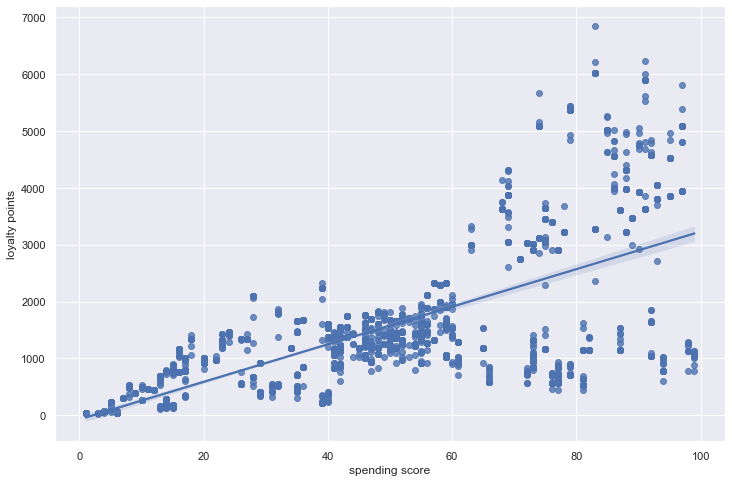

In [199]:
# Check for linearity.
ax = sns.regplot(x, y)
fig = ax.get_figure()
fig.savefig('spending_vs_loyalty.png')

In [193]:
# OLS model and summary.
f = 'y ~ x'
reviews_model = ols(f, data = reviews_new).fit()

reviews_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        22:52:49   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# Extract the estimated parameters.
print("Parameters: ", reviews_model.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_model.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_model.predict()) 


Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [195]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.061693 * reviews_new['spending score'] - 75.052663

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending score, Length: 2000, dtype: float64

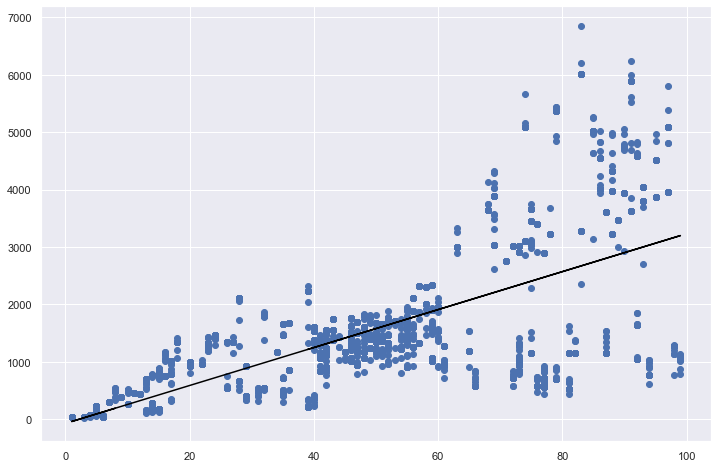

In [196]:
# Plot the graph with a regression line.
# Plot the data points.
ax = plt.scatter(x,y)

# Plot the line.
ax = plt.plot(x,y_pred, color='black')

### 5b) remuneration vs loyalty

In [200]:
# Independent variable.
x = reviews_new['remuneration'] 

# Dependent variable.
y = reviews_new['loyalty points'] 

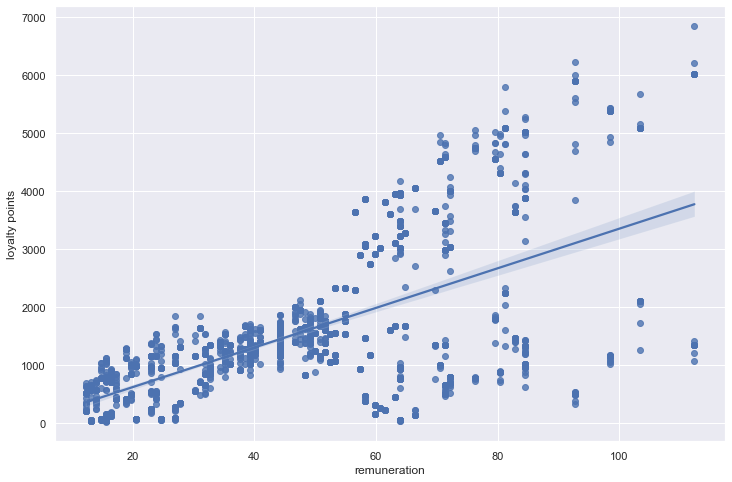

In [202]:
# Check for linearity.
ax = sns.regplot(x, y)
fig = ax.get_figure()
fig.savefig('remuneration_vs_loyalty.png')

In [203]:
# OLS model and summary.
f = 'y ~ x'
reviews_model = ols(f, data = reviews_new).fit()

reviews_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        22:54:22   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# Extract the estimated parameters.
print("Parameters: ", reviews_model.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_model.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_model.predict()) 


Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [205]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = 34.187825 * reviews_new['remuneration'] - 65.686513

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

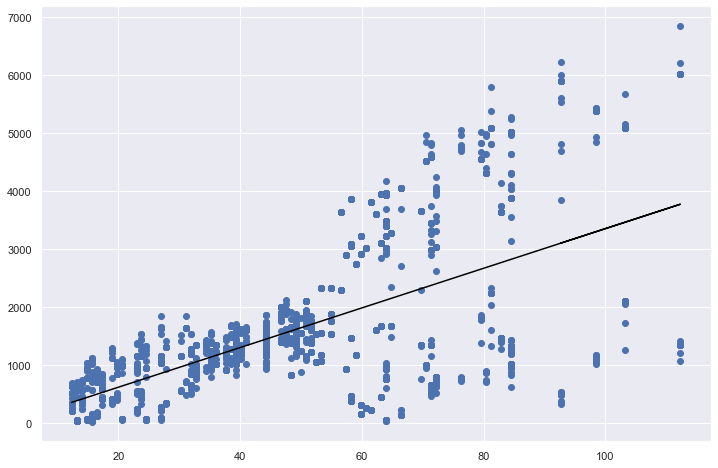

In [206]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

### 5c) age vs loyalty

In [207]:
# Independent variable.
x = reviews_new['age'] 

# Dependent variable.
y = reviews_new['loyalty points'] 

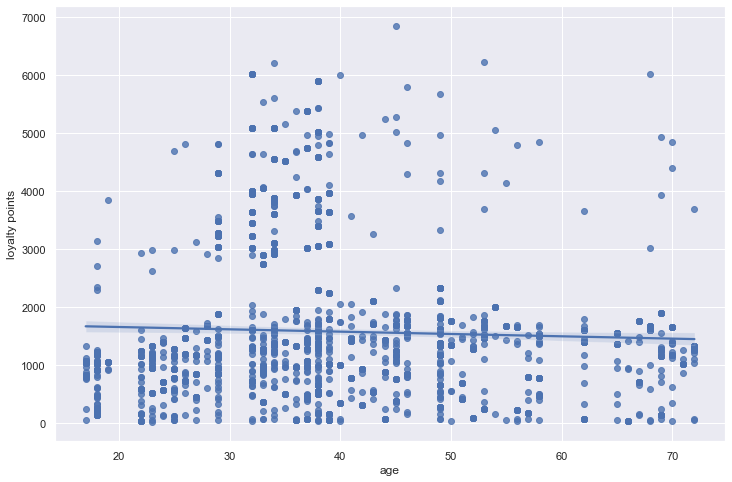

In [208]:
# Check for linearity.
ax = sns.regplot(x, y)
fig = ax.get_figure()
fig.savefig('age_vs_loyalty.png')

In [209]:
# OLS model and summary.
f = 'y ~ x'
reviews_model = ols(f, data = reviews_new).fit()

reviews_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sun, 11 Sep 2022   Prob (F-statistic):             0.0577
Time:                        22:54:45   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
# Extract the estimated parameters.
print("Parameters: ", reviews_model.params)  

# Extract the standard errors.
print("Standard errors: ", reviews_model.bse)  

# Extract the predicted values.
print("Predicted values: ", reviews_model.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [211]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.012805 * reviews_new['age'] + 1736.517739

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

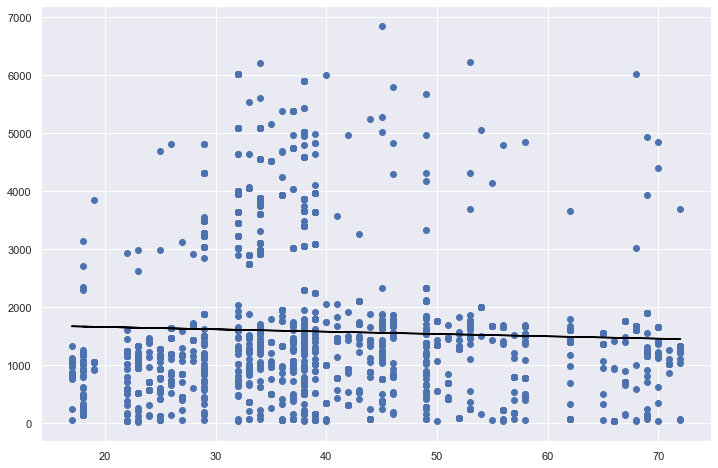

In [212]:
# Plot graph with regression line.
# Plot the data points.
plt.scatter(x,y)

# Plot the line.
plt.plot(x,y_pred, color='black')

## 6. Observations and insights

***Your observations here...***






In [32]:
## More detailed observations and insights are included in the analytical report and presentation.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [296]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [297]:
# Load the CSV file(s) as df2.
pd.read_csv('reviews_new_col.csv')
df2 = pd.read_csv('reviews_new_col.csv')

# View DataFrame.
df2.head()

,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [298]:
# Drop unnecessary columns.
df2_drop = df2.drop(['gender', 'age','loyalty points','education','product','review','summary'], axis = 1)
# View DataFrame.
df2_drop

,remuneration,spending score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [299]:
# Explore the data.
print(df2_drop.shape)
print(df2_drop.columns)
df2_drop.info()

(2000, 2)
Index(['remuneration', 'spending score'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [300]:
# Descriptive statistics.
df2_drop.describe()

,remuneration,spending score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

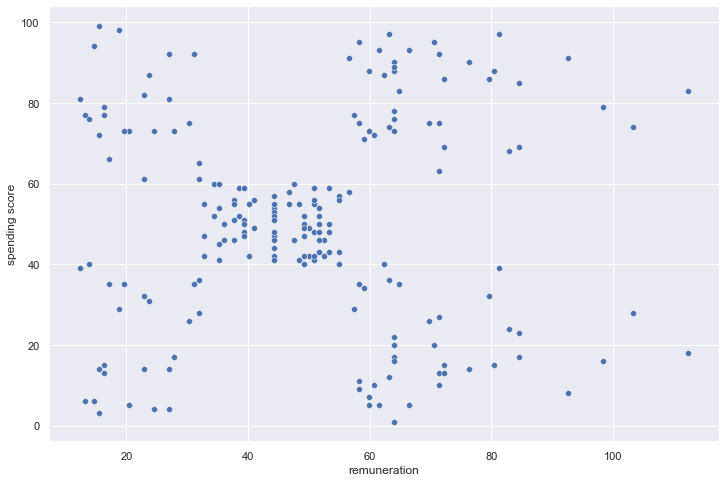

In [301]:
# Create a scatterplot with Seaborn.
ax = sns.scatterplot(data=df2_drop, x='remuneration', y='spending score')
plt.show()

In [302]:
fig = ax.get_figure()
fig.savefig('remuneration_vs_spending_scatterplot.png')

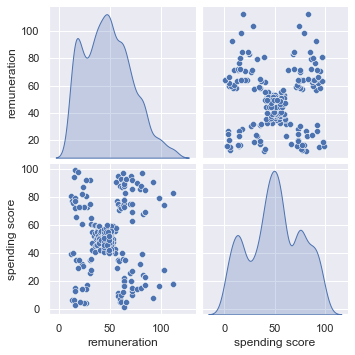

In [303]:
# Create a pairplot with Seaborn.
x = df2_drop[['remuneration', 'spending score']]
sns.pairplot(df2_drop, vars=x, diag_kind= 'kde')

In [304]:
#remuneration_vs_spending_pairplot

## 3. Elbow and silhoutte methods

In [305]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [306]:
df2_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [307]:
# Prepare the data
print(df2_drop.columns)
df2_drop.describe()

Index(['remuneration', 'spending score'], dtype='object')


,remuneration,spending score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


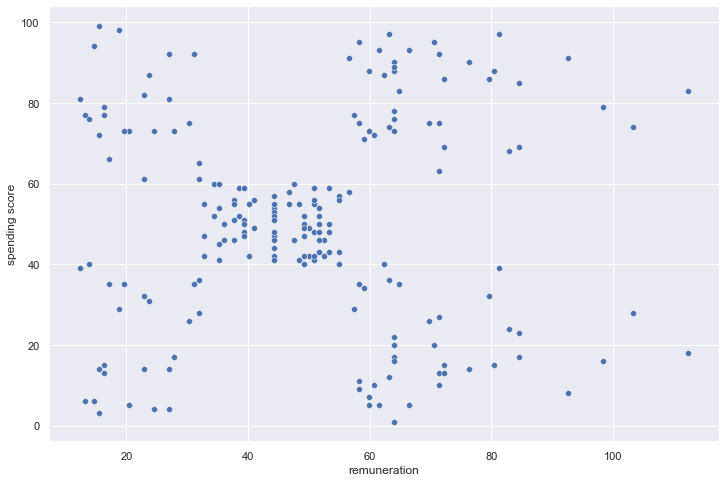

In [308]:
# Visualise the data
ax = sns.scatterplot(x='remuneration', y='spending score',
                data=df2_drop)

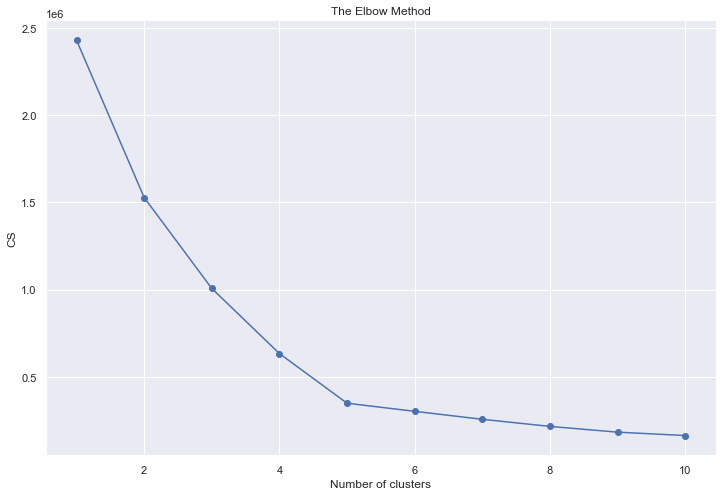

In [309]:
# Import the KMeans class.
from sklearn.cluster import KMeans

# Determine the optimal number of clusters: Elbow method.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

ax = plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS")
plt.show()

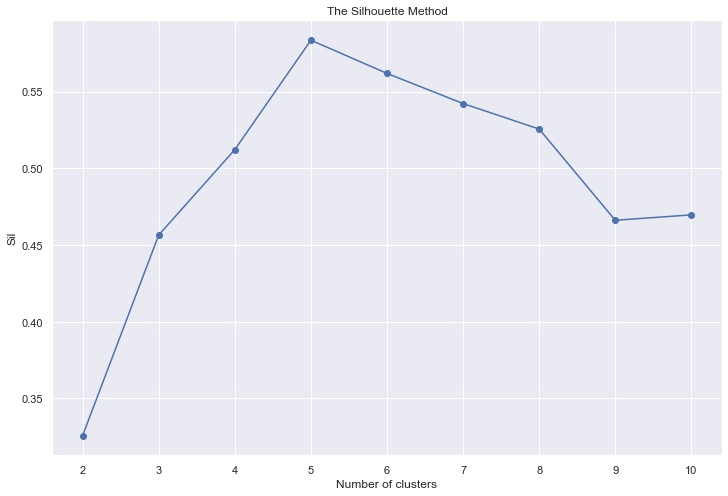

In [311]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
ax = plt.plot(range(2, kmax+1), sil, marker='o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")
plt.show()

## 4. Evaluate k-means model at different values of *k*

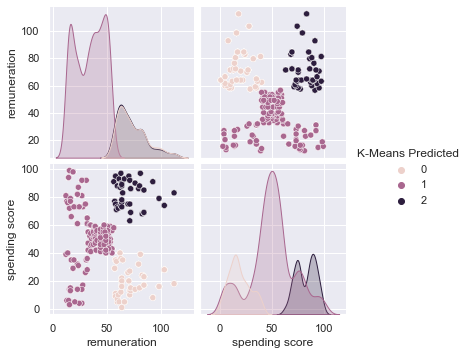

In [230]:
# Use 3 clusters
kmeans = KMeans(n_clusters = 3, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

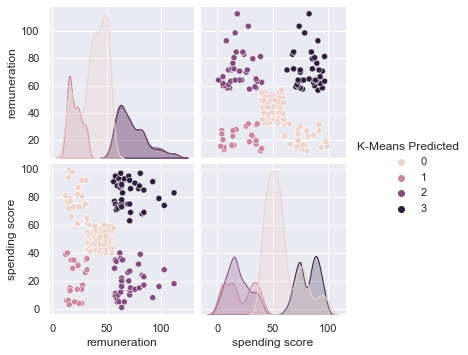

In [231]:
# Use 4 clusters
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

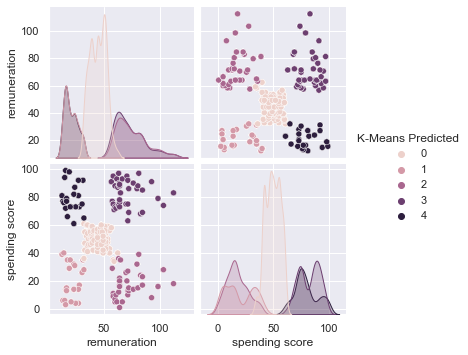

In [232]:
# Use 5 clusters 
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice


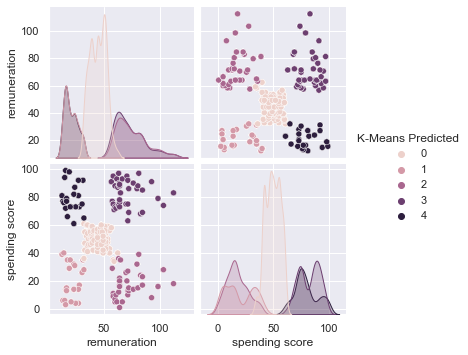

In [233]:
# Apply the final model: 
# The optimal number of clusters is 5 as determined by the Elbow and Silhouette method.
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
ax = sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [235]:
# K-Means_Predicted_5_Clusters.png

In [68]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

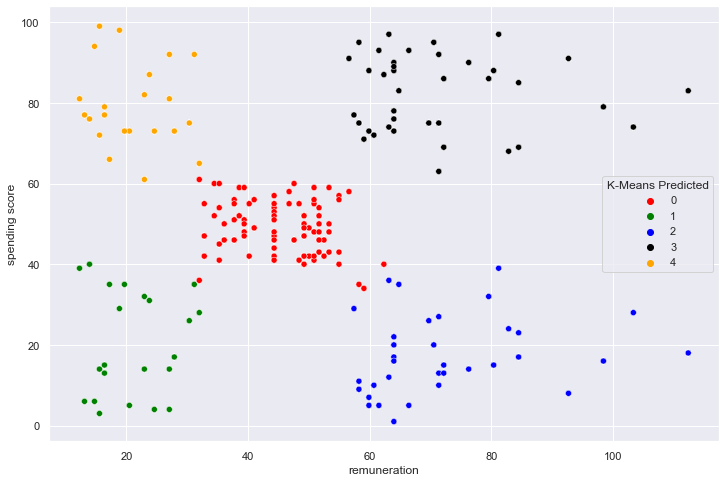

In [237]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

ax = sns.scatterplot(x='remuneration' , 
                y ='spending score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

In [238]:
fig = ax.get_figure()
fig.savefig('5_Clusters.png')

In [71]:
# View the DataFrame.
df2_drop.head()

,remuneration,spending score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


## 7. Discuss: Insights and observations

***Your observations here...***

In [72]:
## More detailed observations and insights are included in the analytical report and presentation.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [73]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [74]:
# Load the data set as df3.
pd.read_csv('reviews_new_col.csv')
df3 = pd.read_csv('reviews_new_col.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending score,loyalty points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [75]:
# Explore data set.
print(df3.shape)
print(df3.columns)
df3.info()

(2000, 9)
Index(['gender', 'age', 'remuneration', 'spending score', 'loyalty points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending score  2000 non-null   int64  
 4   loyalty points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [76]:
df3.describe()

,age,remuneration,spending score,loyalty points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [77]:
# Keep necessary columns. Drop unnecessary columns.
df3_drop = df3.drop(['gender', 'age', 'remuneration', 'spending score', 'loyalty points', 'education', 'product'], axis = 1)
# View DataFrame.
df3_drop

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [78]:
# Determine if there are any missing values.
df3_drop.shape_na = df3[df3.isna().any(axis=1)]
df3_drop.shape

(2000, 2)

In [79]:
df3_drop.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [240]:
# Review: Change all to lower case and join with a space.
df3_drop['review'] = df3_drop['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_drop['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [241]:
# Summary: Change all to lower case and join with a space.
df3_drop['summary'] = df3_drop['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3_drop['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [242]:
# Replace all the punctuations in review column.
df3_drop['review'] = df3_drop['review'].str.replace('[^\w\s]','')
# View output.
df3_drop['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [243]:
# Replace all the puncuations in summary column.
df3_drop['summary'] = df3_drop['summary'].str.replace('[^\w\s]','')

# View output.
df3_drop['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [244]:
# Check the number of duplicate values in the review column.
#df3_drop.review.duplicated().sum()
print(df3_drop.duplicated(subset=['review']).sum())

50


In [245]:
# Check the number of duplicate values in the summary column.
print(df3_drop.duplicated(subset=['summary']).sum())

651


In [246]:
# Drop duplicates in review column.
review = df3_drop.drop_duplicates(subset=['review'])

# Preview data.
review.reset_index(inplace=True)
review.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [247]:
# Drop duplicates in summary column.
summary = df3_drop.drop_duplicates(subset=['summary'])

# Preview data.
summary.reset_index(inplace=True)
summary.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [248]:
# View DataFrame.
df3_drop.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [249]:
# Import the library.
import nltk

# Import the required tokenisation function.
from nltk.tokenize import sent_tokenize

# Import WordCloud
from wordcloud import WordCloud 

In [250]:
# Create new DataFrame (copy DataFrame).
df4 = df3_drop[['review', 'summary']]
# View DataFrame.
df4

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap
...,...,...
1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1996,great game did not think i would like it when ...,super fun
1997,great game for all keeps the mind nimble,great game
1998,fun game,four stars


In [251]:
# Apply tokenisation to both columns.

In [252]:
# Tokenise the words.
df4['tokens_review'] = df4['review'].apply(word_tokenize)
df4['tokens_summary'] = df4['summary'].apply(word_tokenize)

df4 = df4.reset_index()

# Preview data.
df4.head()

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [253]:
# Review: Create a word cloud.
textt = " ".join(review for review in df4.review)
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(textt) 

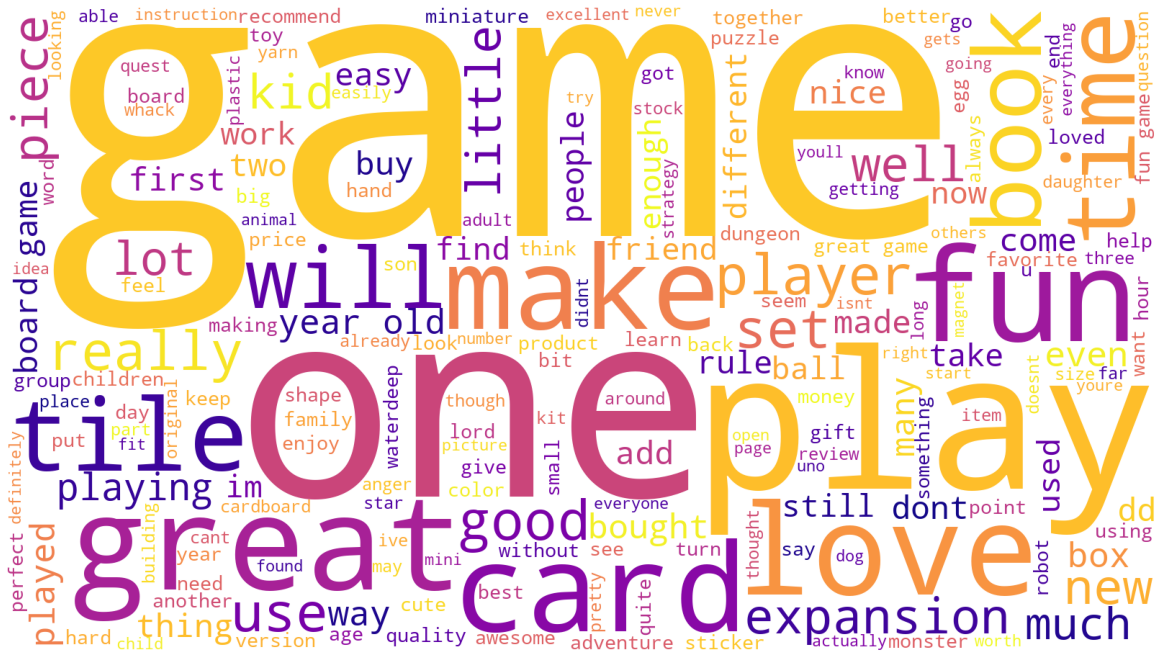

In [254]:
# Review: Plot the WorldCloud image.
ax = plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

all_tokens = []

for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_review'][i]

In [255]:
fig = ax.get_figure()
fig.savefig('wordcloud_review.png')

In [256]:
# Summary: Create a word cloud.
textt = " ".join(summary for summary in df4.summary)
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(textt) 

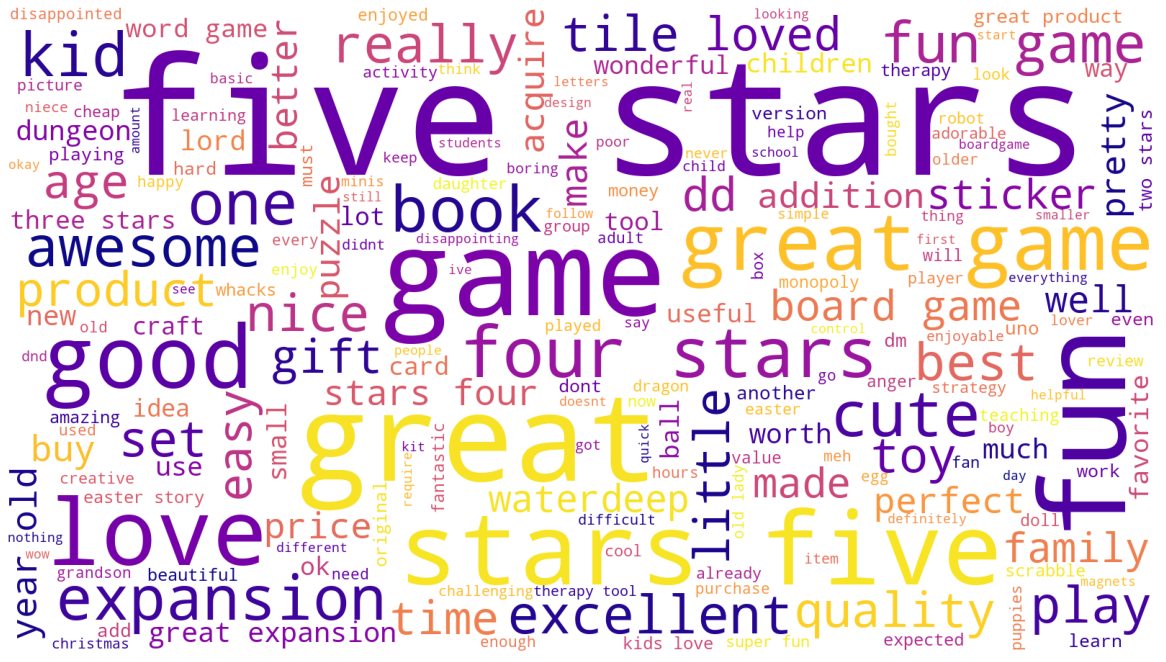

In [257]:
# Summary: Plot the WorldCloud image.
ax = plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

all_tokens = []

for i in range(df4.shape[0]):
    all_tokens = all_tokens + df4['tokens_summary'][i]

In [258]:
fig = ax.get_figure()
fig.savefig('wordcloud_summary.png')

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [259]:
# Import the FreqDist class.
from nltk.probability import FreqDist

In [260]:
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [261]:
# Determine the frequency distribution.
fdist = FreqDist(all_tokens)
# Preview data.
fdist

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [262]:
all_tokens

['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [263]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]


In [264]:
# Remove all the stopwords

# Import the stop word list.
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

In [265]:
# Create a filtered list of tokens without stop words.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''
for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [266]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

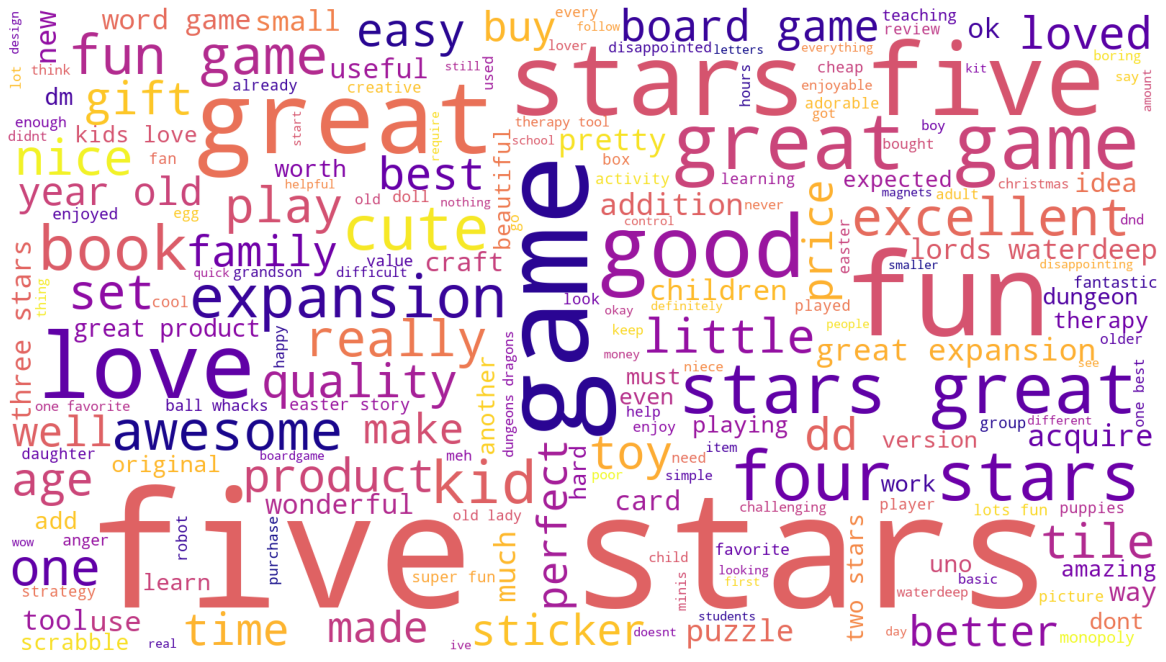

In [267]:
# Plot the WordCloud image.
ax = plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [268]:
fig = ax.get_figure()
fig.savefig('wordcloud_without_stopwords.png')

In [269]:
# View the frequency distribution.
fdist1 = FreqDist(tokens2)

# Preview the data.
fdist1

FreqDist({'stars': 466, 'five': 381, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4d) Identify 15 most common words and polarity

In [270]:
# Determine the 15 most common words.

In [271]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

,Frequency
Word,
stars,466
five,381
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


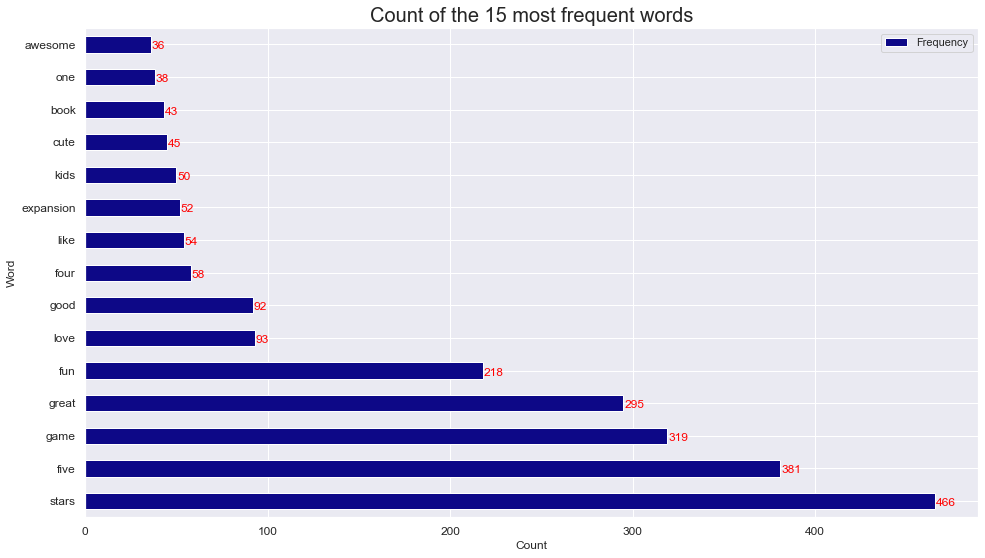

In [272]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')
# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words",
             fontsize=20)
# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [273]:
fig = ax.get_figure()
fig.savefig('15_most_frequent_words.png')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [290]:
# Define a function to extract a polarity score.
def generate_polarity(comment):
    return TextBlob(comment).sentiment[0]

In [291]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for each review.
df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# Preview the result.
df4.head()

,index,review,summary,tokens_review,tokens_summary,polarity_review,polarity_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was...",-0.036111,0.15
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,...",0.035952,-0.80
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]",0.116640,0.00
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]",0.578788,0.00
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]",-0.316667,0.00


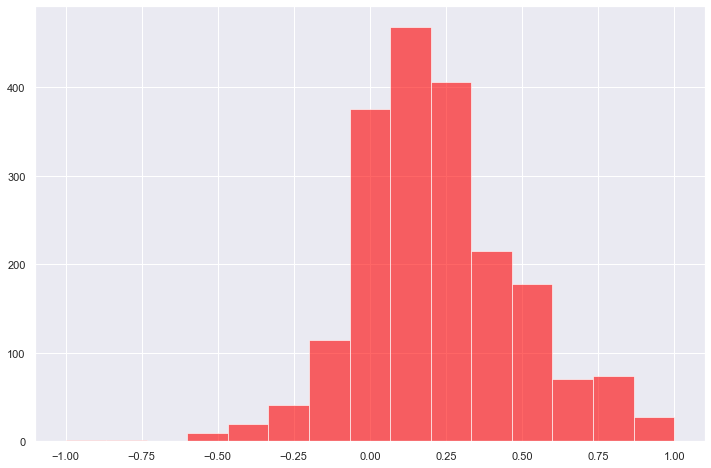

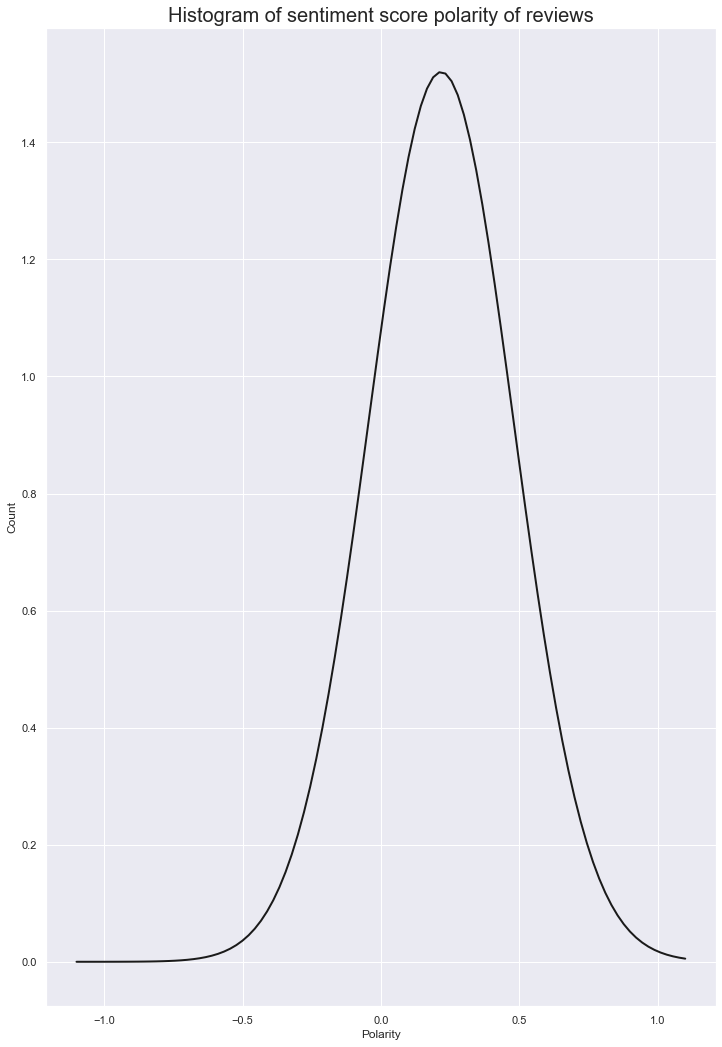

In [292]:
# Review: Create a histogram plot with bins = 15.

# Histogram of polarity
num_bins = 15
ax = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_review'])
p = norm.pdf(x, mu, std)

ax = plt.figure(figsize=(12, 18))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of reviews', fontsize=20)
plt.show()

In [293]:
fig = ax.get_figure()
fig.savefig('sentiment_score_histogram_review.png')

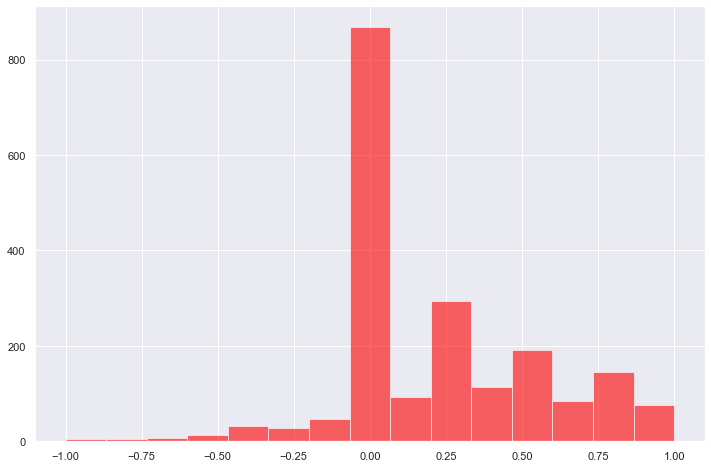

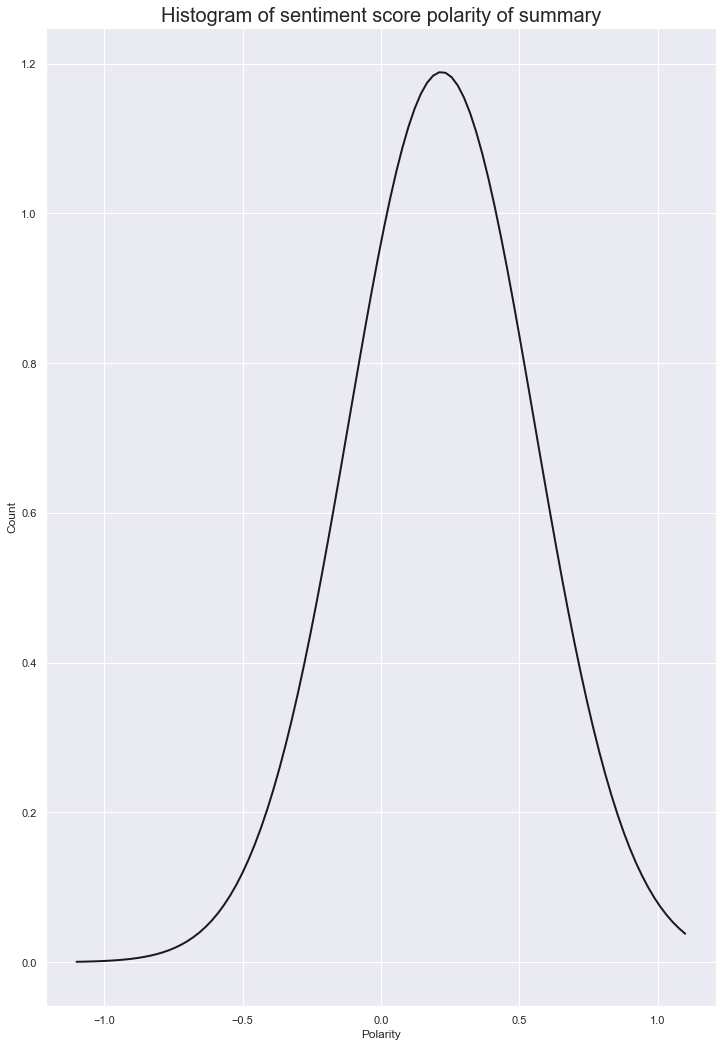

In [278]:
# Summary: Create a histogram plot with bins = 15.

# Histogram of polarity
num_bins = 15
plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Histogram of sentiment score
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df4['polarity_summary'])
p = norm.pdf(x, mu, std)

ax = plt.figure(figsize=(12, 18))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity of summary', fontsize=20)
plt.show()

In [294]:
fig = ax.get_figure()
fig.savefig('sentiment_score_histogram_summary.png')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [280]:
# Top 20 negative reviews.
negative_sentiment_review = df4.nsmallest(20, 'polarity_review')
negative_sentiment_review_fin = negative_sentiment_review[['review', 'polarity_review']]
negative_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(negative_sentiment_review_fin)

                                                 review  polarity_review
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
117   i bought this as a christmas gift for my grand...        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two

In [281]:
# Top 20 negative summaries.
negative_sentiment_summary = df4.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_fin = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(negative_sentiment_summary_fin)

                                                summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
208     boring unless you are a craft person which i am         -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178      at age 31 i found these very 

In [282]:
# Top 20 positive reviews.
positive_sentiment_review = df4.nsmallest(20, 'polarity_review')
positive_sentiment_review_fin = positive_sentiment_review[['review', 'polarity_review']]
positive_sentiment_review_fin.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
print(positive_sentiment_review_fin)

                                                 review  polarity_review
208   booo unles you are patient know how to measure...        -1.000000
182                   incomplete kit very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
117   i bought this as a christmas gift for my grand...        -0.500000
227   this was a gift for my daughter i found it dif...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
1524                         expensive for what you get        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two

In [283]:
# Top 20 positive summaries.
positive_sentiment_summary = df4.nsmallest(20, 'polarity_summary')
positive_sentiment_summary_fin = positive_sentiment_summary[['summary', 'polarity_summary']]
positive_sentiment_summary_fin.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
print(positive_sentiment_summary_fin)

                                                summary  polarity_summary
21                        the worst value ive ever seen         -1.000000
208     boring unless you are a craft person which i am         -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178      at age 31 i found these very 

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
## More detailed observations and insights are included in the analytical report and presentation.

# 